<a href="https://colab.research.google.com/github/premswaroopmusti/Transfer-Learning-using-Tensorflow-keras-and-python/blob/main/Transfer_Learning_using_Tensorflow%2C_Keras_and_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Transfer Learning in Image Classification**
 In this notebook we will use transfer learning and take pre-trained model from google's Tensorflow Hub
 and re-train that on flowers dataset. Using pre-trained model saves lot of time and computational budget for new classification problem at hand



In [2]:
import numpy as np
import cv2

import PIL.Image as Image          # image library in python
import os

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
IMAGE_SHAPE = (224,224)
classifier = tf.keras.Sequential([
                                          hub.KerasLayer('https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4', input_shape = IMAGE_SHAPE+(3,))
])

# **Load Flowers Dataset**

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,cache_dir = '/content/drive/MyDrive/Machine learning projects' ,untar=True)
# u r getting this file into a folder called flower_photos, and the cache directory is the directory where u want to save the dataset
# untar = True is to unzip the zip file

In [5]:
data_dir

'/content/drive/MyDrive/Machine learning projects/datasets/flower_photos'

In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/MyDrive/Machine learning projects/datasets/flower_photos')

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [8]:
roses = (list(data_dir.glob('roses/*')))
roses[:5]

[PosixPath('/content/drive/MyDrive/Machine learning projects/datasets/flower_photos/roses/7345657862_689366e79a.jpg'),
 PosixPath('/content/drive/MyDrive/Machine learning projects/datasets/flower_photos/roses/7409458444_0bfc9a0682_n.jpg'),
 PosixPath('/content/drive/MyDrive/Machine learning projects/datasets/flower_photos/roses/9337528427_3d09b7012b.jpg'),
 PosixPath('/content/drive/MyDrive/Machine learning projects/datasets/flower_photos/roses/5736328472_8f25e6f6e7.jpg'),
 PosixPath('/content/drive/MyDrive/Machine learning projects/datasets/flower_photos/roses/7551637034_55ae047756_n.jpg')]

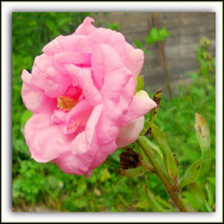

In [9]:
Image.open(str(roses[1])).resize(IMAGE_SHAPE)

In [10]:
tulips = (list(data_dir.glob('tulips/*')))
tulips[:5]

[PosixPath('/content/drive/MyDrive/Machine learning projects/datasets/flower_photos/tulips/4042180234_64cd2859c9_m.jpg'),
 PosixPath('/content/drive/MyDrive/Machine learning projects/datasets/flower_photos/tulips/17165583356_38cb1f231d_n.jpg'),
 PosixPath('/content/drive/MyDrive/Machine learning projects/datasets/flower_photos/tulips/12949131454_4d3392f4dd_n.jpg'),
 PosixPath('/content/drive/MyDrive/Machine learning projects/datasets/flower_photos/tulips/5208680166_c4372477ef_n.jpg'),
 PosixPath('/content/drive/MyDrive/Machine learning projects/datasets/flower_photos/tulips/7002703410_3e97b29da5_n.jpg')]

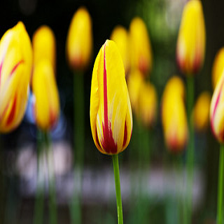

In [11]:
Image.open(str(tulips[9])).resize(IMAGE_SHAPE)

# Read flowers images from drive into numpy array using opencv



In [12]:
 flower_images_dict = {
    'roses' :        list(data_dir.glob('roses/*')),
    'tulips' :        list(data_dir.glob('tulips/*')),
     'daisy' :       list(data_dir.glob('roses/*')),
     'dandelion' :   list(data_dir.glob('roses/*')),
     'sunflowers' :  list(data_dir.glob('sunflowers/*'))

}

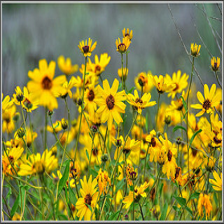

In [13]:
sunflowers = (list(data_dir.glob('sunflowers/*')))

Image.open(str(sunflowers[1])).resize(IMAGE_SHAPE)

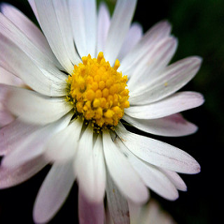

In [14]:
daisy = (list(data_dir.glob('daisy/*')))

Image.open(str(daisy[1])).resize(IMAGE_SHAPE)

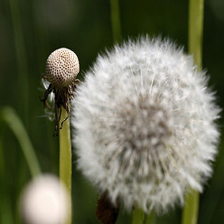

In [15]:
dandelion = (list(data_dir.glob('dandelion/*')))

Image.open(str(dandelion[1])).resize(IMAGE_SHAPE)

In [16]:
 flower_images_dict['tulips']

[PosixPath('/content/drive/MyDrive/Machine learning projects/datasets/flower_photos/tulips/4042180234_64cd2859c9_m.jpg'),
 PosixPath('/content/drive/MyDrive/Machine learning projects/datasets/flower_photos/tulips/17165583356_38cb1f231d_n.jpg'),
 PosixPath('/content/drive/MyDrive/Machine learning projects/datasets/flower_photos/tulips/12949131454_4d3392f4dd_n.jpg'),
 PosixPath('/content/drive/MyDrive/Machine learning projects/datasets/flower_photos/tulips/5208680166_c4372477ef_n.jpg'),
 PosixPath('/content/drive/MyDrive/Machine learning projects/datasets/flower_photos/tulips/7002703410_3e97b29da5_n.jpg'),
 PosixPath('/content/drive/MyDrive/Machine learning projects/datasets/flower_photos/tulips/8562853756_73778dac25_n.jpg'),
 PosixPath('/content/drive/MyDrive/Machine learning projects/datasets/flower_photos/tulips/8708856019_f3be2353a4_n.jpg'),
 PosixPath('/content/drive/MyDrive/Machine learning projects/datasets/flower_photos/tulips/3511776685_3635087b12_n.jpg'),
 PosixPath('/content/d

In [17]:
 flower_labels_dict = {
     'roses' : 0,
     'daisy': 1,
     'dandelion' : 2,
     'sunflowers' : 3,
     'tulips' : 4
 }

In [18]:
str(flower_images_dict['tulips'][1])


'/content/drive/MyDrive/Machine learning projects/datasets/flower_photos/tulips/17165583356_38cb1f231d_n.jpg'

In [19]:
img = cv2.imread(str(flower_images_dict['tulips'][0]))
img.shape

(192, 240, 3)

here images are of different shapes
so we need to resize it

before training a model u need to make sure all images are of same size

In [20]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [21]:
x, y = [], []
for flower_name, images in flower_images_dict.items():
  for i in images:
    img = cv2.imread(str(i))
    resized_image = cv2.resize(img,(224,224))
    x.append(resized_image)
    y.append(flower_labels_dict[flower_name])

In [22]:
y[0]

0

In [23]:
x = np.array(x)
y = np.array(y)

# Train test split


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(x,y, random_state = 0)

# Preprocessing: scale images


In [25]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [26]:
Y_train[0]

3

In [27]:
X_test_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.42352941, 0.61960784, 0.66666667],
        [0.42745098, 0.63137255, 0.6745098 ],
        [0.42352941, 0.64705882, 0.6745098 ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.42352941, 0.61960784, 0.66666667],
        [0.41960784, 0.62352941, 0.66666667],
        [0.40392157, 0.63137255, 0.66666667]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.43529412, 0.62352941, 0.67058824],
        [0.41568627, 0.61960784, 0.6627451 ],
        [0.38039216, 0.61176471, 0.65098039]],

       ...,

       [[0.94509804, 0.91372549, 0.94509804],
        [0.94901961, 0.9372549 , 0.9254902 ],
        [0.92941176, 0

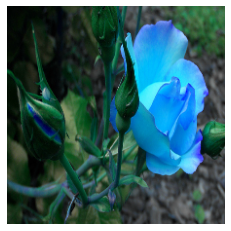

In [28]:
plt.axis('off')
plt.imshow(x[0])

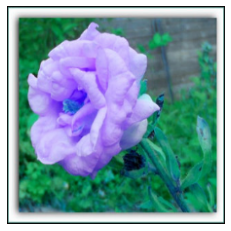

In [29]:
plt.axis('off')
plt.imshow(x[1])

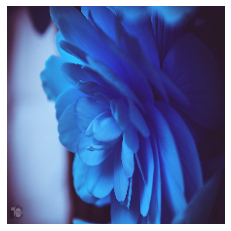

In [30]:
plt.axis('off')
plt.imshow(x[2])

In [31]:
predicted = classifier.predict(np.array([x[0],x[1],x[2]]))
predicted = np.argmax(predicted,axis = 1)
predicted

array([795, 550, 795])

# Now take pre-trained model and retrain it using flowers images


In [32]:
# this model has same layers as the previous models except the last layer
feature_extractor_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model_without_toplayer = hub.KerasLayer(
    feature_extractor_model, input_shape = (224,224,3), trainable = False)  # trainable = False means freeze, which means do not train


In [33]:
num_of_flowers = 5

model = tf.keras.Sequential([
                             pretrained_model_without_toplayer,
                             tf.keras.layers.Dense(num_of_flowers)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['acc']
)


model.fit(X_train_scaled, Y_train, epochs = 30)

Epoch 1/30
81/81 [==============================] - 70s 821ms/step - loss: 1.3233 - acc: 0.4460
Epoch 2/30
81/81 [==============================] - 67s 828ms/step - loss: 1.0113 - acc: 0.5298
Epoch 3/30
81/81 [==============================] - 69s 855ms/step - loss: 0.9226 - acc: 0.5622
Epoch 4/30
81/81 [==============================] - 69s 851ms/step - loss: 0.8763 - acc: 0.5704
Epoch 5/30
81/81 [==============================] - 67s 831ms/step - loss: 0.8333 - acc: 0.5856
Epoch 6/30
81/81 [==============================] - 73s 903ms/step - loss: 0.8109 - acc: 0.5840
Epoch 7/30
81/81 [==============================] - 69s 838ms/step - loss: 0.8063 - acc: 0.6168
Epoch 8/30
81/81 [==============================] - 70s 871ms/step - loss: 0.7724 - acc: 0.6039
Epoch 9/30
81/81 [==============================] - 70s 860ms/step - loss: 0.7535 - acc: 0.6148
Epoch 10/30
81/81 [==============================] - 68s 836ms/step - loss: 0.7414 - acc: 0.6152
Epoch 11/30
81/81 [====================

In [37]:
model.evaluate(X_test_scaled,Y_test)

27/27 [==============================] - 31s 1s/step - loss: 1.3595 - acc: 0.4252


[1.3595198392868042, 0.4252336323261261]